#### Esse mini projeto tem como objetivo explorar os dados das queimadoas do Brasil do ano de 2011 até 2022, coletadas pelo o site https://queimadas.dgi.inpe.br/queimadas/bdqueimadas#exportar-dados

In [2]:
import pandas as pd
import numpy as np
from dash import Dash
import plotly.express as px
from scipy.stats import trim_mean
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df_2011_2021 = pd.read_csv("focos-queimadas-brasil-2011-2021-002.csv",sep = ',')
df_2022 = pd.read_csv("Focos_2022-01-03_2022-12-07.csv",sep = ',')

df = pd.concat([df_2011_2021,df_2022])
df

,Unnamed: 0,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,pais
0,0.0,2011/01/01 04:33:00,AQUA_M-M,SAO PAULO,ITUPEVA,Mata Atlantica,NaN,NaN,NaN,-23.14400,-47.11800,NaN,NaN
1,1.0,2011/01/01 09:05:48,NOAA-16N,RIO GRANDE DO NORTE,TOUROS,Caatinga,NaN,NaN,NaN,-5.32167,-35.62667,NaN,NaN
2,2.0,2011/01/01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,NaN,NaN,NaN,-9.03354,-38.32000,NaN,NaN
3,3.0,2011/01/01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,NaN,NaN,NaN,-9.00355,-38.33000,NaN,NaN
4,4.0,2011/01/01 13:00:00,GOES-12,PERNAMBUCO,FLORESTA,Caatinga,NaN,NaN,NaN,-8.81357,-38.53000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195401,NaN,2022/12/07 16:47:00,AQUA_M-T,CEARA,MOMBACA,Caatinga,NaN,NaN,NaN,-5.72511,-39.79423,56.6,Brasil
195402,NaN,2022/12/07 16:47:00,AQUA_M-T,CEARA,TAUA,Caatinga,NaN,NaN,NaN,-5.94157,-39.92683,45.3,Brasil
195403,NaN,2022/12/07 16:47:00,AQUA_M-T,RIO GRANDE DO NORTE,APODI,Caatinga,NaN,NaN,NaN,-5.65971,-38.06494,39.0,Brasil
195404,NaN,2022/12/07 16:49:00,AQUA_M-T,CEARA,IPAPORANGA,Caatinga,NaN,NaN,NaN,-4.89644,-40.61369,48.3,Brasil


## Explorando e limpando os dados

In [7]:
df.drop(['Unnamed: 0', 'pais'], axis =1, inplace=True)
df

,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2011/01/01 04:33:00,AQUA_M-M,SAO PAULO,ITUPEVA,Mata Atlantica,NaN,NaN,NaN,-23.14400,-47.11800,NaN
1,2011/01/01 09:05:48,NOAA-16N,RIO GRANDE DO NORTE,TOUROS,Caatinga,NaN,NaN,NaN,-5.32167,-35.62667,NaN
2,2011/01/01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,NaN,NaN,NaN,-9.03354,-38.32000,NaN
3,2011/01/01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,NaN,NaN,NaN,-9.00355,-38.33000,NaN
4,2011/01/01 13:00:00,GOES-12,PERNAMBUCO,FLORESTA,Caatinga,NaN,NaN,NaN,-8.81357,-38.53000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195401,2022/12/07 16:47:00,AQUA_M-T,CEARA,MOMBACA,Caatinga,NaN,NaN,NaN,-5.72511,-39.79423,56.6
195402,2022/12/07 16:47:00,AQUA_M-T,CEARA,TAUA,Caatinga,NaN,NaN,NaN,-5.94157,-39.92683,45.3
195403,2022/12/07 16:47:00,AQUA_M-T,RIO GRANDE DO NORTE,APODI,Caatinga,NaN,NaN,NaN,-5.65971,-38.06494,39.0
195404,2022/12/07 16:49:00,AQUA_M-T,CEARA,IPAPORANGA,Caatinga,NaN,NaN,NaN,-4.89644,-40.61369,48.3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29360427 entries, 0 to 195405
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   datahora      object 
 1   satelite      object 
 2   estado        object 
 3   municipio     object 
 4   bioma         object 
 5   diasemchuva   float64
 6   precipitacao  float64
 7   riscofogo     float64
 8   latitude      float64
 9   longitude     float64
 10  frp           float64
dtypes: float64(6), object(5)
memory usage: 2.6+ GB


In [9]:
df.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,2.449739e+07,2.449739e+07,2.449739e+07,2.936043e+07,2.936043e+07,8.250305e+06
mean,1.358547e+01,7.187974e-01,-7.721010e+00,-1.036197e+01,-5.148136e+01,2.030435e+01
std,8.054118e+01,3.292095e+00,9.190020e+01,5.887504e+00,7.121668e+00,5.991733e+01
min,-9.990000e+02,0.000000e+00,-9.990000e+02,-3.374046e+01,-7.393146e+01,-3.700000e+00
25%,2.000000e+00,0.000000e+00,7.000000e-01,-1.368300e+01,-5.638989e+01,3.400000e+00
50%,7.000000e+00,0.000000e+00,1.000000e+00,-9.643220e+00,-5.060000e+01,7.600000e+00
75%,2.200000e+01,1.000000e-01,1.000000e+00,-6.351910e+00,-4.595300e+01,1.770000e+01
max,3.570000e+02,2.037000e+02,1.000000e+00,5.230000e+00,-3.241993e+01,9.722600e+03


In [10]:
#Retornando uma amostra aleatória de itens de um eixo de objeto.
df.sample(n=5) 

,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
2673557,2012/08/31 17:25:00,NPP-375,TOCANTINS,DIANOPOLIS,Cerrado,NaN,NaN,NaN,-11.57084,-46.42419,NaN
26740825,2021/04/26 18:23:49,GOES-16,GOIAS,BRITANIA,Cerrado,6.0,0.1,0.7,-15.39000,-51.03000,NaN
25975380,2021/10/13 16:52:00,NPP-375,PARA,CACHOEIRA DO PIRIA,Amazonia,4.0,0.0,0.3,-1.68812,-46.55207,5.8
14625911,2018/09/12 04:10:00,AQUA_M-M,MATO GROSSO,SANTA TEREZINHA,Amazonia,23.0,11.0,0.0,-9.87600,-50.50500,46.7
13544430,2017/10/10 21:04:55,GOES-16,MARANHAO,BARRA DO CORDA,Cerrado,0.0,0.0,1.0,-5.14000,-45.19000,NaN


In [11]:
#Tirando os numeros faltantes e substituindo por zero
df['diasemchuva'].fillna(0, inplace = True)
df['precipitacao'].fillna(0, inplace = True)
df['riscofogo'].fillna(0, inplace = True)
df['frp'].fillna(0, inplace = True)

In [40]:
# Transformando o tipo da coluna datahora para datetime
df['datahora'] = pd.to_datetime(df['datahora'], format = '%Y/%m/%d')

In [41]:
df

,datahora,satelite,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2011-01-01 04:33:00,AQUA_M-M,SAO PAULO,ITUPEVA,Mata Atlantica,0.0,0.0,0.0,-23.14400,-47.11800,0.0
1,2011-01-01 09:05:48,NOAA-16N,RIO GRANDE DO NORTE,TOUROS,Caatinga,0.0,0.0,0.0,-5.32167,-35.62667,0.0
2,2011-01-01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,0.0,0.0,0.0,-9.03354,-38.32000,0.0
3,2011-01-01 12:45:00,GOES-12,BAHIA,GLORIA,Caatinga,0.0,0.0,0.0,-9.00355,-38.33000,0.0
4,2011-01-01 13:00:00,GOES-12,PERNAMBUCO,FLORESTA,Caatinga,0.0,0.0,0.0,-8.81357,-38.53000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195401,2022-12-07 16:47:00,AQUA_M-T,CEARA,MOMBACA,Caatinga,0.0,0.0,0.0,-5.72511,-39.79423,56.6
195402,2022-12-07 16:47:00,AQUA_M-T,CEARA,TAUA,Caatinga,0.0,0.0,0.0,-5.94157,-39.92683,45.3
195403,2022-12-07 16:47:00,AQUA_M-T,RIO GRANDE DO NORTE,APODI,Caatinga,0.0,0.0,0.0,-5.65971,-38.06494,39.0
195404,2022-12-07 16:49:00,AQUA_M-T,CEARA,IPAPORANGA,Caatinga,0.0,0.0,0.0,-4.89644,-40.61369,48.3


## Qual ano e bioma que teve mais queimadas?

In [22]:
dados = df[['datahora','bioma','diasemchuva','precipitacao','riscofogo','frp']]
dados


,datahora,bioma,diasemchuva,precipitacao,riscofogo,frp
0,2011/01/01 04:33:00,Mata Atlantica,0.0,0.0,0.0,0.0
1,2011/01/01 09:05:48,Caatinga,0.0,0.0,0.0,0.0
2,2011/01/01 12:45:00,Caatinga,0.0,0.0,0.0,0.0
3,2011/01/01 12:45:00,Caatinga,0.0,0.0,0.0,0.0
4,2011/01/01 13:00:00,Caatinga,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195401,2022/12/07 16:47:00,Caatinga,0.0,0.0,0.0,56.6
195402,2022/12/07 16:47:00,Caatinga,0.0,0.0,0.0,45.3
195403,2022/12/07 16:47:00,Caatinga,0.0,0.0,0.0,39.0
195404,2022/12/07 16:49:00,Caatinga,0.0,0.0,0.0,48.3


In [42]:
biomas_por_ano =pd.DataFrame( df.groupby(df['datahora'].dt.year)['bioma'].value_counts())
biomas_por_ano.rename(columns={'bioma': 'count'}, inplace = True)
biomas_por_ano.reset_index(inplace=True)

In [43]:
queimaidas_por_ano = px.line(biomas_por_ano,  x= "datahora",y= 'count',color = 'bioma')
queimaidas_por_ano.update_layout(xaxis = dict(title = 'Anos',
                                linecolor='rgba(0,0,0,1)', # adicionando linppppppppe3ha em y = 0
                                tickmode = 'array', # alterando o modo dos ticks
                                tickformat=False,
                               ), # setando o valor do tick de x
                    yaxis = dict(title = 'Quantidade',  # alterando o titulo do eixo y
                                  linecolor='rgba(0,0,0,1)', # adicionando linha em x = 0
                                  ),
                    title_text='Queimadas por ano dos biomas brasileiros', title_x = 0.5)
queimaidas_por_ano

## Ranking dos biomas mais prejudicados 

In [25]:
quant =pd.DataFrame( df.groupby("bioma").size().sort_values(ascending=False))
quant.reset_index(inplace=True)
quant

,bioma,0
0,Amazonia,12922529
1,Cerrado,10785566
2,Caatinga,1977401
3,Mata Atlantica,1930249
4,Pantanal,1639266
5,Pampa,104416


In [26]:
go.Figure(data=[go.Table(
    header=dict(values=list(quant.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[quant['bioma'],quant[0]],
               fill_color='lavender',
               align='left'))
])

## Municipios mais prejudicados

In [27]:
municipios = pd.DataFrame( df.groupby("municipio").size().sort_values(ascending=False))
municipios

,0
municipio,
CORUMBA,709085
ALTAMIRA,566607
SAO FELIX DO XINGU,490127
PORTO VELHO,463526
LABREA,354481
...,...
Entre Rios,1
Itambe,1
Itajai,1


## Qual é o ranking dos estados mais prejudicados por ano?

In [29]:
ranking =pd.DataFrame(df.groupby([df['datahora'].dt.year,'estado'])[['bioma']].value_counts())
ranking.reset_index(inplace=True)
ranking.sort_values(by=['datahora', 0], ascending=False, inplace = True)
ranking

,datahora,estado,bioma,0
578,2022,PARA,Amazonia,40158
557,2022,AMAZONAS,Amazonia,21070
569,2022,MATO GROSSO,Amazonia,20904
566,2022,MARANHAO,Cerrado,14898
592,2022,RONDONIA,Amazonia,12386
...,...,...,...,...
15,2011,MARANHAO,Caatinga,363
46,2011,SERGIPE,Caatinga,295
36,2011,RIO GRANDE DO NORTE,Mata Atlantica,265
29,2011,PARANA,Cerrado,66


In [30]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(ranking.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[ranking['datahora'] , ranking['estado'], ranking['bioma'], ranking[0]],
               fill_color='lavender',
               align='left'))
])
fig

## Estados mais prejudicados

In [31]:
x =pd.DataFrame(df.groupby("estado").size())
x.reset_index(inplace=True)

In [32]:
px.bar(x, x='estado', y=x[0].sort_values(ascending=False))

## Há alguma diferencia na queimadas dos biomas entre 2011 e 2022

In [34]:
var =pd.DataFrame( df.groupby(df['datahora'].dt.year)[['estado','bioma']].value_counts())
var.reset_index(inplace=True)
var_2011_2022 = var[(var['datahora']==2011) | (var['datahora']==2022)]
var_2011_2022


,datahora,estado,bioma,0
0,2011,PARA,Amazonia,67192
1,2011,MARANHAO,Cerrado,41492
2,2011,MATO GROSSO,Amazonia,41173
3,2011,TOCANTINS,Cerrado,38494
4,2011,BAHIA,Cerrado,30186
...,...,...,...,...
597,2022,SERGIPE,Mata Atlantica,36
598,2022,ALAGOAS,Caatinga,27
599,2022,PARANA,Cerrado,16
600,2022,RIO GRANDE DO NORTE,Mata Atlantica,15


In [35]:
#grafico para mostrar a diferença
graf_difenca = px.histogram(var_2011_2022, x='bioma', y=0,
             color='datahora', barmode='group',
             height=400)
graf_difenca 

## Queimadas dos biomas por anos

In [36]:
# grafico com todos os anos

grafico_difereca_entre_anos= px.histogram(var, x='datahora', y=var[0],
             color='bioma', barmode='group',
             height=400)
grafico_difereca_entre_anos

## Bioma por estações

In [45]:
primavera = (df['datahora'] > '2016-09-23') & (df['datahora']  <= '2016-12-21')
verao = (df['datahora']  > '2016-12-21') | ( df['datahora']  >= '2016-01-01') & (df['datahora']  < '2016-03-21')
outono = (df['datahora']  > '2016-03-21') & (df['datahora']  <= '2016-06-20')
inverno = (df['datahora'] > '2016-06-20') & (df['datahora']  <= '2016-09-23')

df['estacao']=''
df.loc[primavera, 'estacao']="primavera"
df.loc[verao, 'estacao']="verao"
df.loc[outono,'estacao']="outono"
df.loc[inverno, 'estacao']='inverno'


In [47]:
# Contado por grupo de risco e por estação
df.filter(items=["riscofogo", "estacao"])\
     .groupby(["estacao",pd.cut(df["riscofogo"], np.arange(0, 1+.25, .25))])\
     .count().rename(columns={'riscofogo':'Total'})

Total
estacao   riscofogo            
          (0.0, 0.25]    179782
          (0.25, 0.5]    275881
          (0.5, 0.75]    260822
          (0.75, 1.0]   3631822
inverno   (0.0, 0.25]     39547
          (0.25, 0.5]     51001
          (0.5, 0.75]     50977
          (0.75, 1.0]    889760
outono    (0.0, 0.25]      6962
          (0.25, 0.5]     10586
          (0.5, 0.75]      9850
          (0.75, 1.0]     81516
primavera (0.0, 0.25]     70948
          (0.25, 0.5]     89747
          (0.5, 0.75]     67552
          (0.75, 1.0]    378079
verao     (0.0, 0.25]   1373672
          (0.25, 0.5]   1707489
          (0.5, 0.75]   1419038
          (0.75, 1.0]  12575042

 Qual é a correlacao dos biomas com as estações

In [50]:
estacao_bioma=pd.DataFrame(index=df['bioma'].unique())
for estacao in ("primavera", "verao", "outono", "inverno"): 
    for bioma in df['bioma'].unique():
        #estacao_bioma.set_value(bioma,estacao, len(dados.loc[ (dados['estacao']==estacao) & (dados['bioma']==bioma)]))
        estacao_bioma.loc[bioma,estacao] = len(df.loc[ (df['estacao']==estacao) & (df['bioma']==bioma)])


(5.0, 0.0)

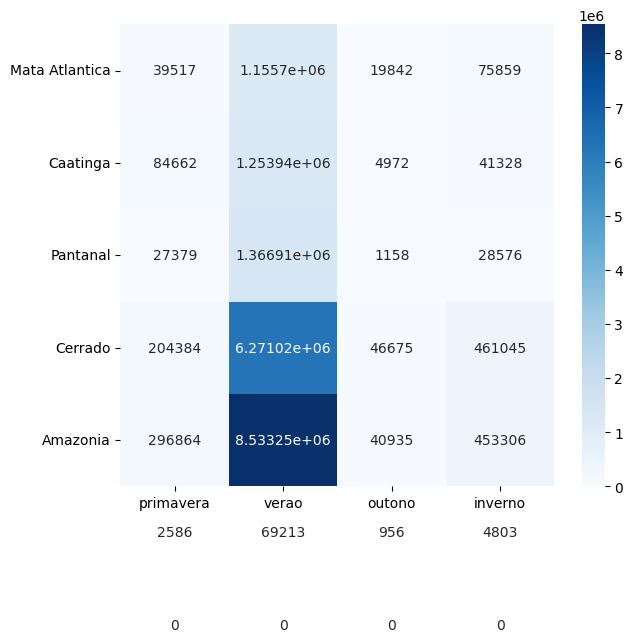

In [57]:
f, ax = plt.subplots(figsize=(7, 6))        
sns.heatmap(estacao_bioma, cmap='Blues', annot=True, fmt='g', ax=ax)
ax.set_ylim(5, 0)


## Matrix de correlação 

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_8712\326060382.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Blues",


(4.0, 0.0)

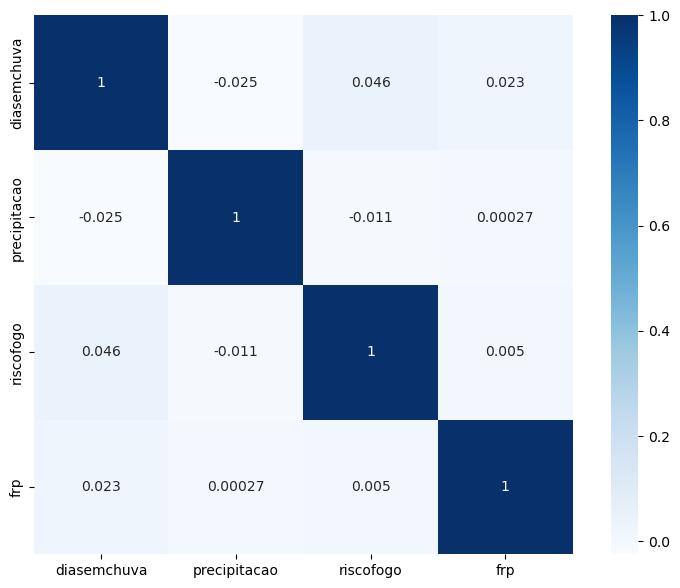

In [11]:
f, ax = plt.subplots(figsize=(10, 7))


corr = dados.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Blues",
            square=True, ax=ax, annot=True)
ax.set_ylim(4.0, 0)

## Matrix de correlação nos ultimos 7 anos

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_8712\3353429457.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Blues',


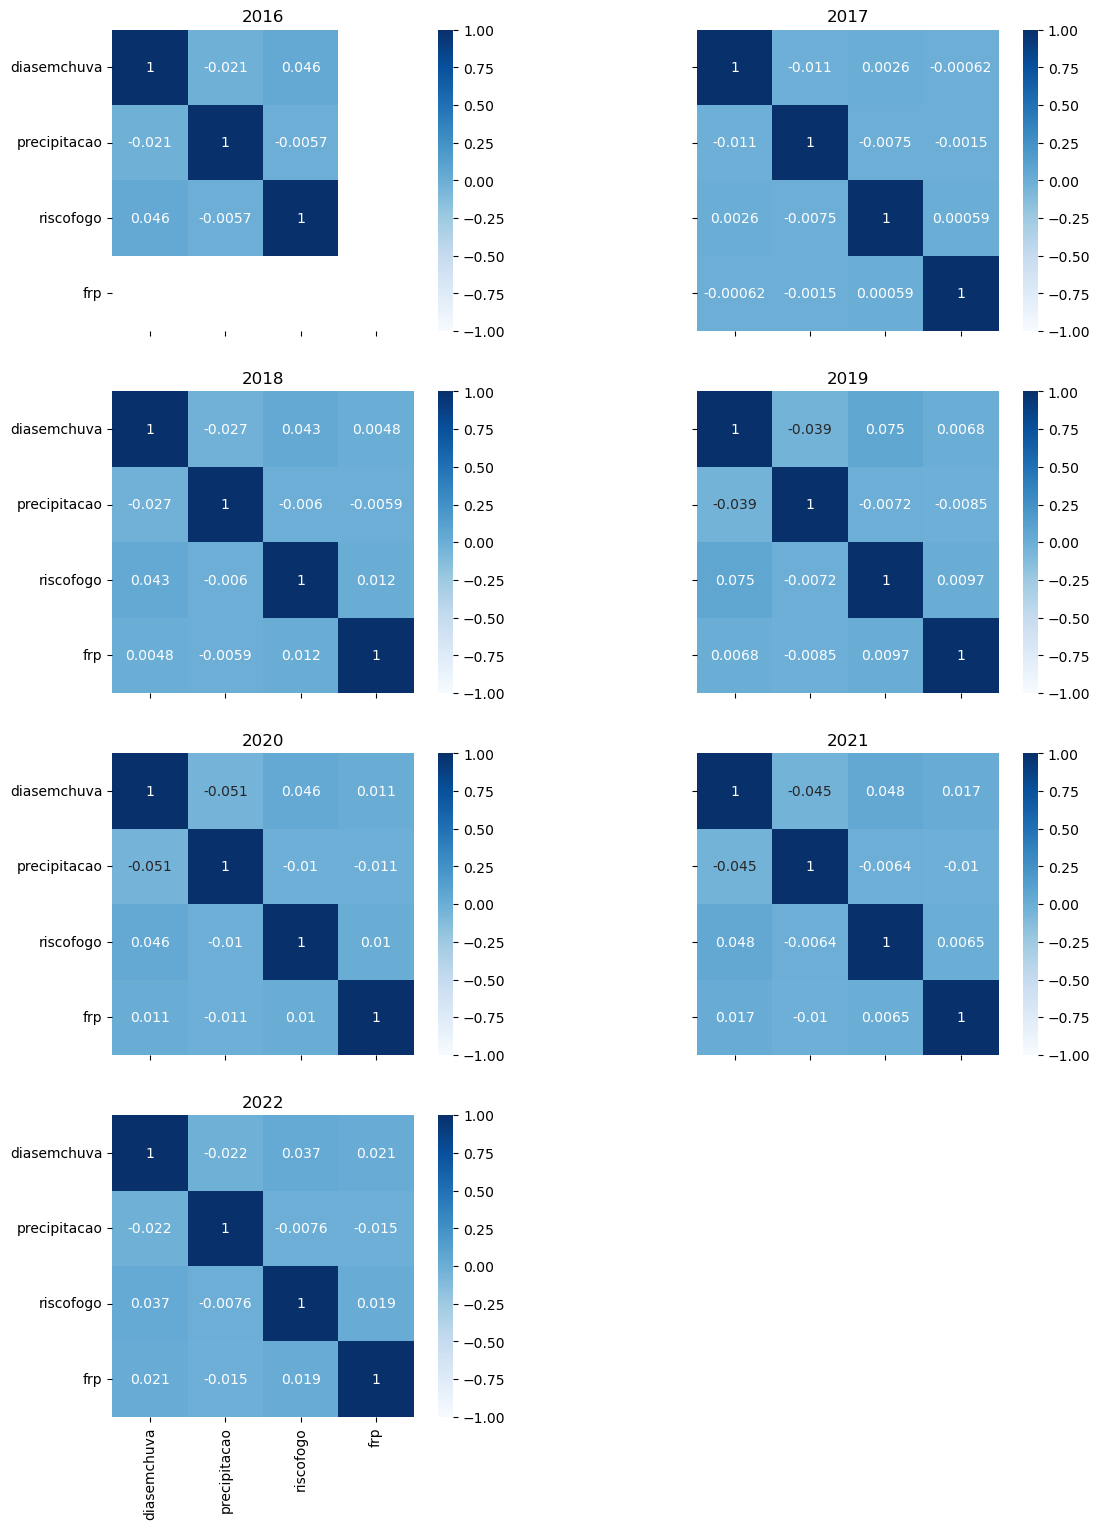

In [12]:
anos = [2016,2017,2018,2019,2020,2021,2022]

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True)
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i in range(0, 7):
    corr = dados[dados['datahora'].dt.year == anos[i]].corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Blues', 
                square=True, ax=ax[i], annot=True, vmin=-1, vmax=1)
    ax[i].set_title(str(anos[i]))
    ax[i].set_ylim(4.0, 0)

ax8.set_visible(False)

plt.subplots_adjust(hspace=0.2, top=3, right=1.8)

## Regressão linear 

In [70]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [51]:
dados.drop(['datahora'], axis = 1,inplace =True )

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_1920\2698141911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.drop(['datahora'], axis = 1,inplace =True )


In [52]:
# classificando as informções em numericas
le.fit(dados.bioma) 
dados.bioma = le.transform(dados.bioma)


C:\Users\Beatriz\AppData\Local\Temp\ipykernel_1920\370758500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.bioma = le.transform(dados.bioma)


In [53]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29360427 entries, 0 to 195405
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bioma         int32  
 1   diasemchuva   float64
 2   precipitacao  float64
 3   riscofogo     float64
 4   frp           float64
dtypes: float64(4), int32(1)
memory usage: 1.2 GB


In [54]:
x = dados.drop(['riscofogo'], axis = 1)
y = dados.riscofogo   

In [56]:
#separando o x e y test e o x e y train para poder treinar o modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [57]:

r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.004914340645258308


O modelo linear explica que 0,49% da variância da variável dependente a partir do regressores 

In [58]:
print('Intercepto:', lr.intercept_)

Intercepto: -2.8287291311276945


In [60]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bioma,-3.151412
diasemchuva,0.052694
precipitacao,-0.340708
frp,0.011366


In [61]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 14.073106953605482
MSE: 7007.181493449528
RMSE: 83.70890928359734


## Teste de hipotese

Teste de normalidade

O risco de fogo é verdadeira

In [67]:
from scipy.stats import normaltest

In [75]:
significancia = 0.05

<AxesSubplot:>

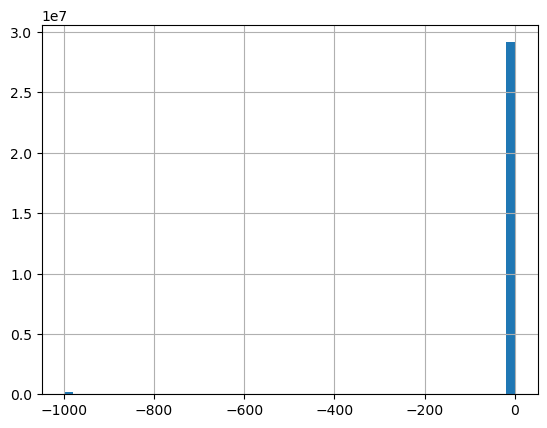

In [76]:
dados1.riscofogo.hist(bins = 50)

In [82]:
normaltest(dados1.riscofogo)



NormaltestResult(statistic=48924401.64411907, pvalue=0.0)

In [84]:
stat_test, p_valor = normaltest(dados1.riscofogo)
print(stat_test)
print(p_valor)

48924401.64411907
0.0


In [85]:
p_valor <= significancia

True

Não é proveniente de uma distribuição normal, rejeitando assim a hipotese.
Agora vamos ver se o bioma é proviniente.

<AxesSubplot:>

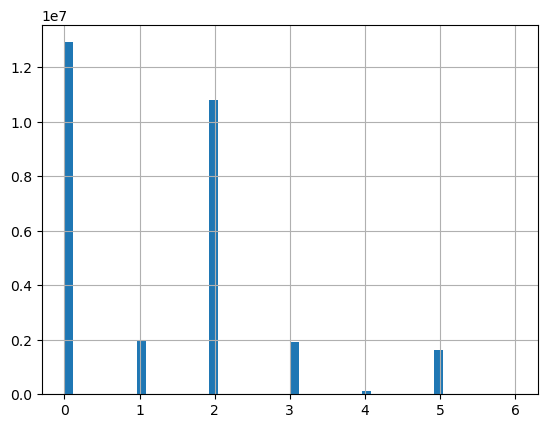

In [91]:
dados1.bioma.hist(bins = 50)

In [92]:
normaltest(dados1.bioma)


NormaltestResult(statistic=3216872.404763416, pvalue=0.0)

In [94]:
stat_test, p_valor = normaltest(dados1.bioma)
print(stat_test)
print(p_valor)

3216872.404763416
0.0


In [95]:
p_valor <= significancia

True

Não é proveniente de uma distribuição normal, rejeitando assim a hipotese.


<AxesSubplot:>

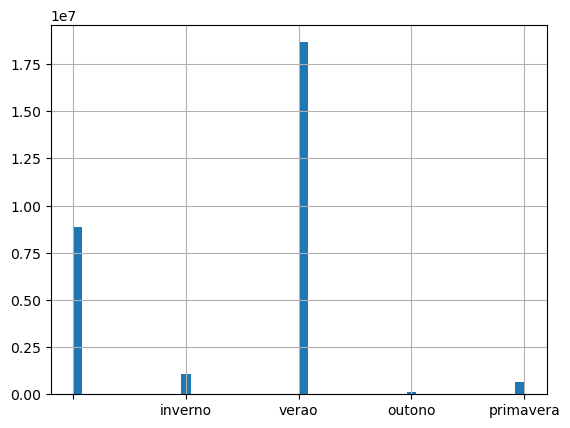

In [65]:
df.estacao.hist(bins = 50)

In [ ]:
le.fit(df.estacao) 
df.estacao = le.transform(df.estacao)


In [ ]:
normaltest(df.estacao)
stat_test, p_valor = normaltest(dados1.bioma)
print(stat_test)
print(p_valor)